In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

In [15]:
emails = pd.read_csv('emails.csv')
#import our csv file

In [16]:
emails.head()
#view the top colums

,sender_email,sender_name,recipient_name,recipient_email,date_sent,subject,email_body
0,james_ngola2002@maktoob.com,james_ngola2002@maktoob.com,"""MR. JAMES NGOLA.""",james_ngola2002@maktoob.com,31 Oct 2002,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...
1,bensul2004nng@spinfinder.com,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",bensul2004nng@spinfinder.com,31 Oct 2002,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ..."
2,obong_715@epatra.com,obong_715@epatra.com,"""PRINCE OBONG ELEME""",obong_715@epatra.com,31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
3,obong_715@epatra.com,obong_715@epatra.com,"""PRINCE OBONG ELEME""",obong_715@epatra.com,31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
4,m_abacha03@www.com,m_abacha03@www.com,"""Maryam Abacha""",m_abacha03@www.com,1 Nov 2002,I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope..."


In [17]:
print('Shape of data ==>', emails.shape)
#print the number of rows and columns

Shape of data ==> (4040, 7)


In [18]:
emails.columns
#view the columns

Index(['sender_email', 'sender_name', 'recipient_name', 'recipient_email',
       'date_sent', 'subject', 'email_body'],
      dtype='object')

## Data Pre-processing

In [19]:
emails.isnull().sum()
#check for missing values
#get the sum of all the missing values
#call variable name and ask if it is null

sender_email        473
sender_name         473
recipient_name     3989
recipient_email     263
date_sent           620
subject              27
email_body            1
dtype: int64

In [20]:
emails.dropna(inplace=True)
#drop the missing values
#axis = 0 means drop row and axis = 1 means drop column
emails.isnull().sum()

sender_email       0
sender_name        0
recipient_name     0
recipient_email    0
date_sent          0
subject            0
email_body         0
dtype: int64

In [21]:
print('Shape of data ==>', emails.shape)

Shape of data ==> (45, 7)


## Important Colums

In [22]:
emails = emails[['sender_name','recipient_name','date_sent','subject','email_body']]
print('Shape of data ==>', emails.shape)
emails.head()

Shape of data ==> (45, 5)


,sender_name,recipient_name,date_sent,subject,email_body
0,james_ngola2002@maktoob.com,"""MR. JAMES NGOLA.""",31 Oct 2002,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...
1,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",31 Oct 2002,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ..."
2,obong_715@epatra.com,"""PRINCE OBONG ELEME""",31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
3,obong_715@epatra.com,"""PRINCE OBONG ELEME""",31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
4,m_abacha03@www.com,"""Maryam Abacha""",1 Nov 2002,I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope..."


In [23]:
emails

,sender_name,recipient_name,date_sent,subject,email_body
0,james_ngola2002@maktoob.com,"""MR. JAMES NGOLA.""",31 Oct 2002,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...
1,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",31 Oct 2002,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ..."
2,obong_715@epatra.com,"""PRINCE OBONG ELEME""",31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
3,obong_715@epatra.com,"""PRINCE OBONG ELEME""",31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
4,m_abacha03@www.com,"""Maryam Abacha""",1 Nov 2002,I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope..."
7,william2244drallo@maktoob.com,"""William Drallo""",3 Nov 2002,URGENT BUSINESS PRPOSAL,FROM: WILLIAM DRALLO.\nCONFIDENTIAL TEL: 233-2...
8,abdul_817@rediffmail.com,"""MR USMAN ABDUL""",04 Nov 2002,THANK YOU,"CHALLENGE SECURITIES LTD.\nLAGOS, NIGERIA\n\n\..."
11,sjordan@diplomats.com,"""Dr.Sam jordan""",08 Nov 2002,URGENT ASSISTANCE.,FROM THE DESK OF DR.SAM JORDAN\nTHE MANAGER\nH...
14,mikebunduu1@rediffmail.com,"""COL. MICHAEL BUNDU""",13 Nov 2001,*****SPAM***** IMPORTANT,FROM: COL. MICHAEL BUNDU. \nDEMOCRATIC REPUBLI...
15,elixwilliam@usa.com,"""MRS MARIAM ABACHA""",14 Nov 2002,TRUST TRANSACTION,"Dear Sir,\n\nA Very Good day to you \n\nI am..."


### We’ll only be considering recipients with more than or equals to four emails

In [24]:
emails = emails.groupby('recipient_name').filter(lambda x: len(x)>=3)
#lambda functions can be called anonymous functions or one line functions
#here we are interested in emails sent in October
#groupby would take all the products with the same name and group them as one
#.filter is basically to fetch or apply the lambda function
emails.head()

,sender_name,recipient_name,date_sent,subject,email_body
0,james_ngola2002@maktoob.com,"""MR. JAMES NGOLA.""",31 Oct 2002,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...
1,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",31 Oct 2002,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ..."
2,obong_715@epatra.com,"""PRINCE OBONG ELEME""",31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
3,obong_715@epatra.com,"""PRINCE OBONG ELEME""",31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
4,m_abacha03@www.com,"""Maryam Abacha""",1 Nov 2002,I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope..."


## Finding Unique Products

In [25]:
emails['recipient_name'].unique()

array(['"MR. JAMES NGOLA."', '"Mr. Ben Suleman"', '"PRINCE OBONG ELEME"',
       '"Maryam Abacha"', '"William Drallo"', '"MR USMAN ABDUL"',
       '"Dr.Sam jordan"', '"COL. MICHAEL BUNDU"', '"MRS MARIAM ABACHA"',
       '" DR. ANAYO AWKA "', '"Victor Aloma"', '"JAMES NGOLA"'],
      dtype=object)

In [26]:
len(emails['recipient_name'].unique())

12

## Text Data Cleaning

In [27]:
emails['recipient_name'].unique()

array(['"MR. JAMES NGOLA."', '"Mr. Ben Suleman"', '"PRINCE OBONG ELEME"',
       '"Maryam Abacha"', '"William Drallo"', '"MR USMAN ABDUL"',
       '"Dr.Sam jordan"', '"COL. MICHAEL BUNDU"', '"MRS MARIAM ABACHA"',
       '" DR. ANAYO AWKA "', '"Victor Aloma"', '"JAMES NGOLA"'],
      dtype=object)

## Cleaning email_body

In [36]:
for index, text in enumerate(emails['email_body'][0:5]):
    print('Email {}\n {}'.format(index+1, text))
#we are slicing from item 35 to item 40. This will capture 35, 36, 37, 38, 39
#enumerate means to go through

Email 1
 FROM:MR. JAMES NGOLA.
CONFIDENTIAL TEL: 233-27-587908.
E-MAIL: (james_ngola2002@maktoob.com).

URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.


DEAR FRIEND,

I AM ( DR.) JAMES NGOLA, THE PERSONAL ASSISTANCE TO THE LATE CONGOLESE (PRESIDENT LAURENT KABILA) WHO WAS ASSASSINATED BY HIS BODY GUARD ON 16TH JAN. 2001.


THE INCIDENT OCCURRED IN OUR PRESENCE WHILE WE WERE HOLDING MEETING WITH HIS EXCELLENCY OVER THE FINANCIAL RETURNS FROM THE DIAMOND SALES IN THE AREAS CONTROLLED BY (D.R.C.) DEMOCRATIC REPUBLIC OF CONGO FORCES AND THEIR FOREIGN ALLIES ANGOLA AND ZIMBABWE, HAVING RECEIVED THE PREVIOUS DAY (USD$100M) ONE HUNDRED MILLION UNITED STATES DOLLARS, CASH IN THREE DIPLOMATIC BOXES ROUTED THROUGH ZIMBABWE.

MY PURPOSE OF WRITING YOU THIS LETTER IS TO SOLICIT FOR YOUR ASSISTANCE AS TO BE A COVER TO THE FUND AND ALSO COLLABORATION IN MOVING THE SAID FUND INTO YOUR BANK ACCOUNT THE SUM OF (USD$25M) TWENTY FIVE MILLION UNITED STATES DOLLARS ONLY, WHICH I DEPOSITED WITH A SECURITY COMP

In [37]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

#key stands for the contraction and the value is the full word

## Compile the contactions with re.compile

In [38]:
contractions_re = re.compile('({})'.format('|'.join(contractions_dict.keys())))
contractions_re

#to convert to patterns we use re.compile
#contractions_dict.keys() returns the key values
#| we are joining it to the key values
# '({})' - it would be returned in a tuple form

re.compile(r"(ain't|'s|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|how'd|how'd'y|how'll|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|should've|shouldn't|shouldn't've|so've|that'd|that'd've|there'd|there'd've|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what've|when've|where'd|where've|who'll|who'll've|who've|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
re.UNICODE)

## Expand Contractions

In [39]:
#Function for expanding contractions
def expand_contractions(text, contractions_dict = contractions_dict):
    #passes text through this function
    
    def replace(match):
        #passes the parameter match
        #whenever a contraction is matched, we replace it with a value
            #we want to find the contractions in our texts and replace them
        return contractions_dict[match.group(0)]
    #index each of the items in the dictionary and group them
    #we want to find the contractions in our texts and replace them
    #index and assign to the function replace
    return contractions_re.sub(replace, text)
#contractions_re.sub is to substitute

#replace will take a match object as a parameter
#it will then return the dictionary,i.e, return the first match object (match.group(0))
#to capture everything, you split the all your objects
#re.search helps prevent having duplicates
#you cannot view the result of search without using group
#if you want to make changes use apply
#if you want to extract from the document you use .filter

In [40]:
emails['email_body']= emails['email_body'].apply(lambda x: expand_contractions(x))
#index email_body
#we use .apply to make the change in our document
#we call lambda, x is constant, x signifies each of the emails in the text, 

## Converting the emails to lowercase

In [41]:
emails['cleaned'] = emails['email_body'].apply(lambda x: x.lower())
#cleaned is a new column (index)

In [42]:
emails

,sender_name,recipient_name,date_sent,subject,email_body,cleaned
0,james_ngola2002@maktoob.com,"""MR. JAMES NGOLA.""",31 Oct 2002,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,from:mr. james ngola.\nconfidential tel: 233-2...
1,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",31 Oct 2002,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...","dear friend,\n\ni am mr. ben suleman a custom ..."
2,obong_715@epatra.com,"""PRINCE OBONG ELEME""",31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,from his royal majesty (hrm) crown ruler of el...
3,obong_715@epatra.com,"""PRINCE OBONG ELEME""",31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,from his royal majesty (hrm) crown ruler of el...
4,m_abacha03@www.com,"""Maryam Abacha""",1 Nov 2002,I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope...","dear sir, \n \nit is with a heart full of hope..."
7,william2244drallo@maktoob.com,"""William Drallo""",3 Nov 2002,URGENT BUSINESS PRPOSAL,FROM: WILLIAM DRALLO.\nCONFIDENTIAL TEL: 233-2...,from: william drallo.\nconfidential tel: 233-2...
8,abdul_817@rediffmail.com,"""MR USMAN ABDUL""",04 Nov 2002,THANK YOU,"CHALLENGE SECURITIES LTD.\nLAGOS, NIGERIA\n\n\...","challenge securities ltd.\nlagos, nigeria\n\n\..."
11,sjordan@diplomats.com,"""Dr.Sam jordan""",08 Nov 2002,URGENT ASSISTANCE.,FROM THE DESK OF DR.SAM JORDAN\nTHE MANAGER\nH...,from the desk of dr.sam jordan\nthe manager\nh...
14,mikebunduu1@rediffmail.com,"""COL. MICHAEL BUNDU""",13 Nov 2001,*****SPAM***** IMPORTANT,FROM: COL. MICHAEL BUNDU. \nDEMOCRATIC REPUBLI...,from: col. michael bundu. \ndemocratic republi...
15,elixwilliam@usa.com,"""MRS MARIAM ABACHA""",14 Nov 2002,TRUST TRANSACTION,"Dear Sir,\n\nA Very Good day to you \n\nI am...","dear sir,\n\na very good day to you \n\ni am..."


## Remove digits and words containing digits

In [43]:
emails['cleaned'] = emails['cleaned'].apply(lambda x: re.sub('\w*\d\w*','',x))
emails.head()
#match alphanumeric, digit and alphanumeric with more than one occurrence
#find pattern and substitute it with a space
#.sub takes in three parameters. The pattern, what to substitute it with and where you want to replace it with
#we are cleaning and removing unecessary things to make the computer understand

,sender_name,recipient_name,date_sent,subject,email_body,cleaned
0,james_ngola2002@maktoob.com,"""MR. JAMES NGOLA.""",31 Oct 2002,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,from:mr. james ngola.\nconfidential tel: --.\n...
1,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",31 Oct 2002,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...","dear friend,\n\ni am mr. ben suleman a custom ..."
2,obong_715@epatra.com,"""PRINCE OBONG ELEME""",31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,from his royal majesty (hrm) crown ruler of el...
3,obong_715@epatra.com,"""PRINCE OBONG ELEME""",31 Oct 2002,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,from his royal majesty (hrm) crown ruler of el...
4,m_abacha03@www.com,"""Maryam Abacha""",1 Nov 2002,I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope...","dear sir, \n \nit is with a heart full of hope..."


## Remove Punctuations and new lines

In [44]:
emails['cleaned'] = emails['cleaned'].apply(lambda x: re.sub('[{}]'.format(re.escape(string.punctuation)), ' ',x))
emails['cleaned']
#escape the spatial characters in a string. If it sees punctuation marks it skips them
#.format replaces everything inside it
#sring.punctuation gives you all the punctuations and spatial characters. It is a list of punctuations
#anytime the pattern is met, it returns it in a list
#when a soatial character is found, it replaces it with a space
#escape is basically to overlook. We are overlooking words with spatial charcters and stores it in a list
#we use .sub to replace all the occurrences in an empty string

0     from mr  james ngola \nconfidential tel     \n...
1     dear friend \n\ni am mr  ben suleman a custom ...
2     from his royal majesty  hrm  crown ruler of el...
3     from his royal majesty  hrm  crown ruler of el...
4     dear sir  \n \nit is with a heart full of hope...
7     from  william drallo \nconfidential tel     \n...
8     challenge securities ltd \nlagos  nigeria\n\n\...
11    from the desk of dr sam jordan\nthe manager\nh...
14    from  col  michael bundu  \ndemocratic republi...
15    dear sir \n\na very good day to you   \n\ni am...
16    from  dr  anayo awka bank manager \n union ban...
17    from  dr  anayo awka bank manager \n union ban...
18    the director \n\n\n\n            seeking for i...
19    the director \n\n\n\n            seeking for i...
20    from  james ngola \nconfidential tel     \ne m...
21    from mr  james ngola \nconfidential tel     \n...
22    dear friend \n\ni am mr  ben suleman a custom ...
23    from his royal majesty  hrm  crown ruler o

In [45]:
emails['cleaned'] = emails['cleaned'].apply(lambda x: re.sub('\n',' ', x))
emails['cleaned']

0     from mr  james ngola  confidential tel      e ...
1     dear friend   i am mr  ben suleman a custom of...
2     from his royal majesty  hrm  crown ruler of el...
3     from his royal majesty  hrm  crown ruler of el...
4     dear sir     it is with a heart full of hope t...
7     from  william drallo  confidential tel       i...
8     challenge securities ltd  lagos  nigeria    at...
11    from the desk of dr sam jordan the manager hea...
14    from  col  michael bundu   democratic republic...
15    dear sir   a very good day to you     i am mrs...
16    from  dr  anayo awka bank manager   union bank...
17    from  dr  anayo awka bank manager   union bank...
18    the director                 seeking for immed...
19    the director                 seeking for immed...
20    from  james ngola  confidential tel      e mai...
21    from mr  james ngola  confidential tel      e ...
22    dear friend   i am mr  ben suleman a custom of...
23    from his royal majesty  hrm  crown ruler o

In [46]:
for index, text in enumerate(emails['cleaned'][0:3]):
    print('Email {}\n {}'.format(index+1, text))

Email 1
 from mr  james ngola  confidential tel      e mail    maktoob com    urgent business assistance and partnership    dear friend   i am   dr   james ngola  the personal assistance to the late congolese  president laurent kabila  who was assassinated by his body guard on  jan      the incident occurred in our presence while we were holding meeting with his excellency over the financial returns from the diamond sales in the areas controlled by  d r c   democratic republic of congo forces and their foreign allies angola and zimbabwe  having received the previous day  usd   one hundred million united states dollars  cash in three diplomatic boxes routed through zimbabwe   my purpose of writing you this letter is to solicit for your assistance as to be a cover to the fund and also collaboration in moving the said fund into your bank account the sum of  usd   twenty five million united states dollars only  which i deposited with a security company in ghana  in a diplomatic box as gold

## Document term matrix

In [47]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [48]:
emails['cleaned'] = emails['cleaned'].apply(lambda x: " ".join(token.lemma_ for token in nlp(x) if not token.is_stop))

In [49]:
from spacy.lang.en.stop_words import STOP_WORDS

print(STOP_WORDS)

{'‘ll', 'someone', 'beforehand', 'but', 'see', 'after', 'thru', 'serious', 'what', 'hers', 're', 'well', '’s', 'various', 'five', 'amongst', 'me', 'since', 'about', 'therein', 'eleven', 'is', 'yourself', 'nine', 'thereupon', 'whose', 'no', '’ll', 'twenty', 'eight', 'my', 'part', 'next', 'up', 'hereafter', 'doing', 'twelve', 'such', 'other', 'over', 'would', 'along', 'their', 'sometime', 'same', 'towards', "'m", 'indeed', 'wherever', 'should', 'at', 'rather', 'whole', 'moreover', 'although', 'everyone', 'does', 'themselves', 'be', 'and', 'against', 'whatever', 'per', 'cannot', 'it', 'might', 'quite', 'own', "'ve", "n't", 'please', 'whither', 'seemed', 'ever', 'the', 'back', 'hundred', 'how', 'these', 'make', 'on', 'now', 'always', 'to', 'an', 'of', 'third', 'whereas', 'three', 'call', 'through', 'six', 'name', 'everything', 'noone', 'her', 'all', 'during', '’m', 'often', 'due', 'though', 'ours', 'were', 'just', 'show', 'some', 'most', 'being', 'ourselves', 'top', 'ca', 'we', 'becoming',

In [50]:
emails_grouped = emails[['recipient_name','cleaned']].groupby('recipient_name').sum()

## Creating a document term matrix

In [51]:
from sklearn.feature_extraction.text import CountVectorizer


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(emails_grouped['cleaned'])
df = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df.index = emails_grouped.index
df.head(3)

,abacha,abbot,abdul,ability,abroad,absolute,accept,acceptable,access,accident,...,world,worry,worth,worthy,write,www,yahoo,year,zaire,zimbabwe
recipient_name,,,,,,,,,,,,,,,,,,,,,
""" DR. ANAYO AWKA """,0,0,0,0,0,0,0,0,0,0,...,6,6,0,0,0,0,0,6,0,0
"""COL. MICHAEL BUNDU""",0,0,0,0,3,0,0,0,9,0,...,0,0,3,3,0,0,0,0,0,0
"""Dr.Sam jordan""",0,0,0,0,0,0,0,0,0,3,...,3,0,0,0,0,0,3,3,0,0


## Generate Wordcloud

In [53]:
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
    wc = WordCloud(width = 400, height = 330, max_words = 150, colormap='Dark2').generate_from_frequencies(data)
    plt.figure(figsize = (10,8))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.title('\n'.join(wrap(title, 60)), fontsize = 13)
    plt.show()

## Transposing the document term matrix

In [54]:
df_dtm = df.transpose()
df_dtm

recipient_name,""" DR. ANAYO AWKA ""","""COL. MICHAEL BUNDU""","""Dr.Sam jordan""","""JAMES NGOLA""","""MR USMAN ABDUL""","""MR. JAMES NGOLA.""","""MRS MARIAM ABACHA""","""Maryam Abacha""","""Mr. Ben Suleman""","""PRINCE OBONG ELEME""","""Victor Aloma""","""William Drallo"""
abacha,0,0,0,0,3,0,9,12,6,0,0,0
abbot,0,0,0,0,0,0,0,0,0,3,0,0
abdul,0,0,0,0,3,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,6,0,0
abroad,0,3,0,0,0,0,9,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
www,0,0,0,0,0,0,6,0,0,0,0,0
yahoo,0,0,3,0,0,0,0,0,0,0,0,3
year,6,0,3,0,6,0,0,0,0,0,0,0
zaire,0,0,0,0,3,0,0,0,0,0,0,0


## Plotting Wordcloud for each recipient

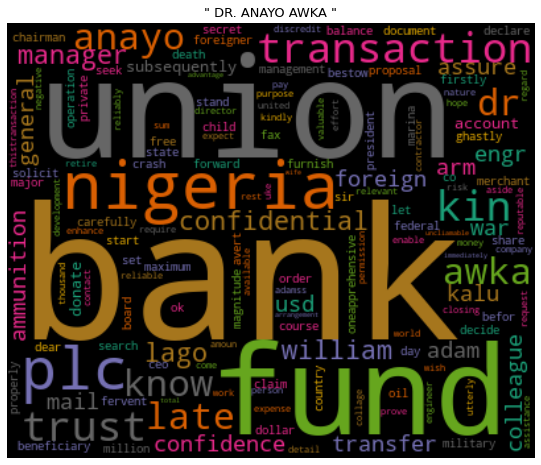

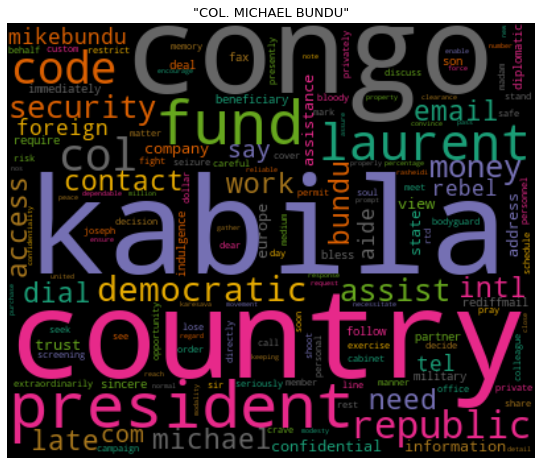

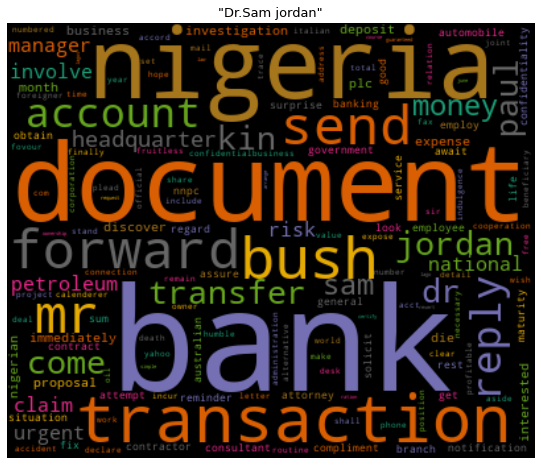

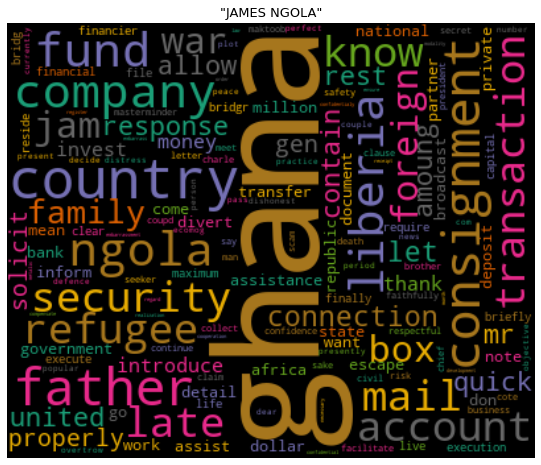

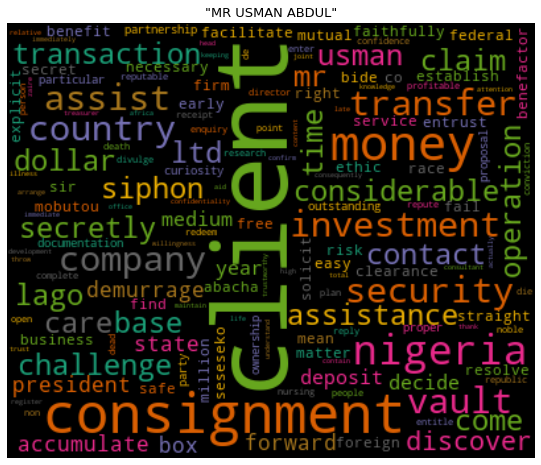

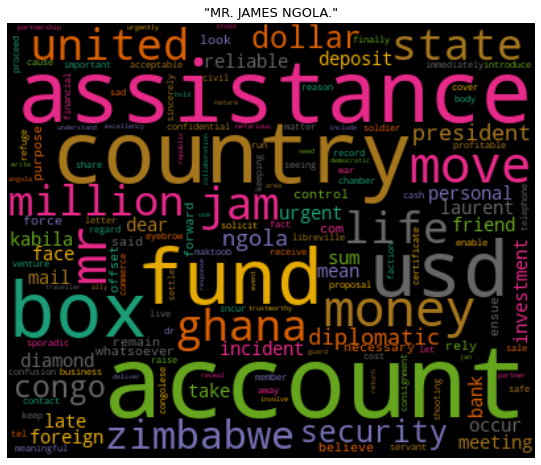

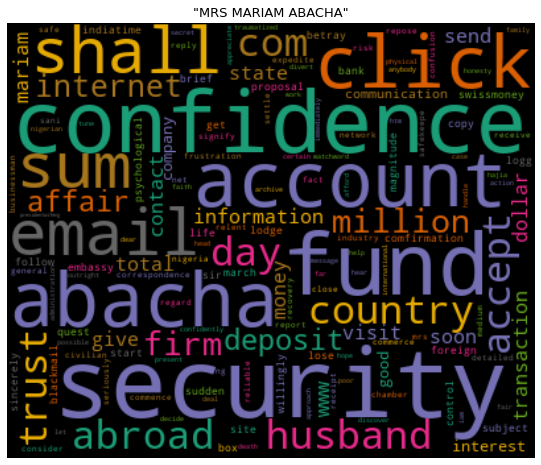

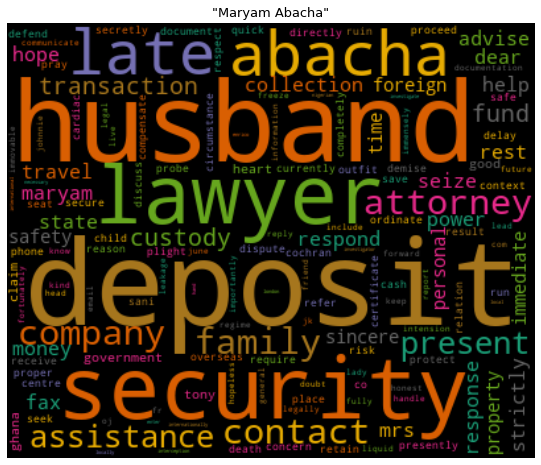

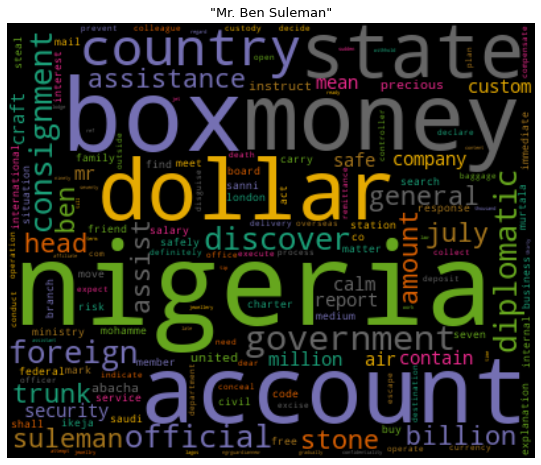

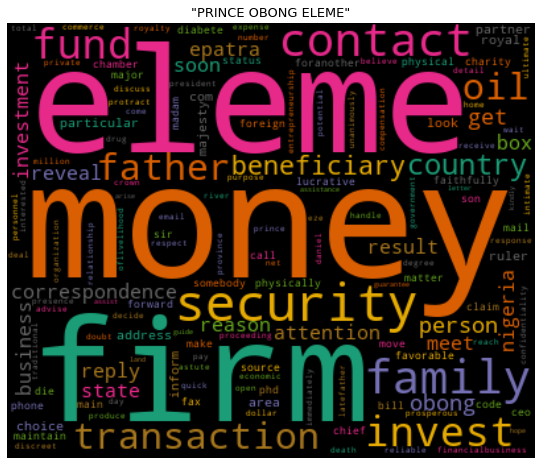

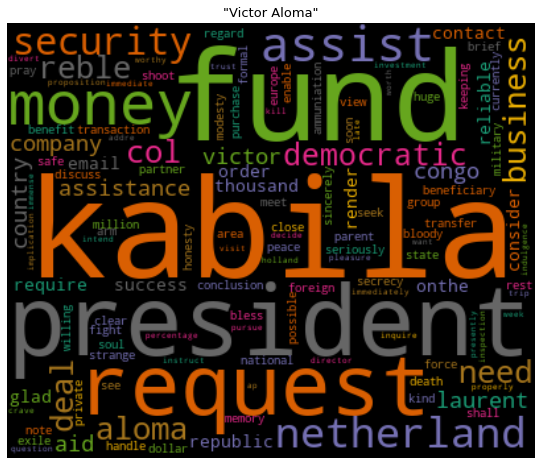

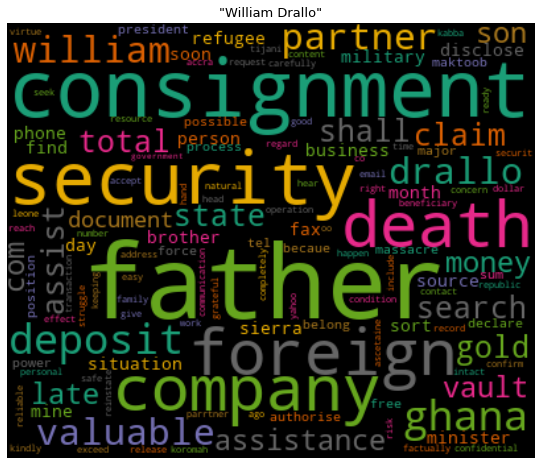

In [55]:
for index,name in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[name].sort_values(ascending=False), name)   